# <center> **★ Data Science Project ★**

## <center> **Problem Definition**

### ***Business Understanding***
Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas

### ***In this project, we focused to answer the following questions***
1. Which store has minimum and maximum sales?
2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
3. Which store/s has good quarterly growth rate in Q3’2012
4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
5. Provide a monthly and semester view of sales in units and give insights
6. Build prediction to forecast demand.

### ***Data Understanding***
There are sales data available for 45 stores of Walmart in Kaggle. This is the data that covers sales from 2010-02-05 to 2012-10-26.
### ***The data contains these features***
* This file contains anonymized information about the 45 stores, additional data related to the store and regional activity for the given dates. It contains the following fields:
>__Walmark.csv__
* Store - the store number
* Date - the week of sales
* Weekly_Sales - sales for the given department in the given store
* Holiday_Flag - whether the week is a special holiday week (1–Holiday week, 0–Non-holiday week)
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* CPI – the consumer price index
* Unemployment - the unemployment rate

*For convenience, the four holidays fall within the following weeks in the dataset.<br>(not all holidays are in the data):*
* *Super Bowl : 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13*
* *Labor Day : 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13*
* *Thanksgiving : 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13*
* *Christmas : 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13*

## <center> **Data Acquisition**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
# Library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
# Algorithm (Linear Regression)
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
# Load dataset
missing_sign = ['n/a','na','nan','--','none']
data_set = pd.read_csv('Walmart.csv', na_values=missing_sign)
data_set.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Check information of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## <center> **Data Preparation**

In [4]:
# Determine variable type
cat_var = ['Store','Holiday_Flag']
num_var = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']

In [5]:
# Convert data type 
for i in num_var:
  data_set[i] = pd.to_numeric(data_set[i], errors='coerce')
data_set[cat_var] = data_set[cat_var].astype('category')
data_set['Date'] = pd.to_datetime(data_set['Date'], format='%d-%m-%Y')

Column : 'Store'
Unique values : [1, 2, 3, 4, 5, ..., 41, 42, 43, 44, 45]
Length: 45
Categories (45, int64): [1, 2, 3, 4, ..., 42, 43, 44, 45]

Column : 'Holiday_Flag'
Unique values : [0, 1]
Categories (2, int64): [0, 1]



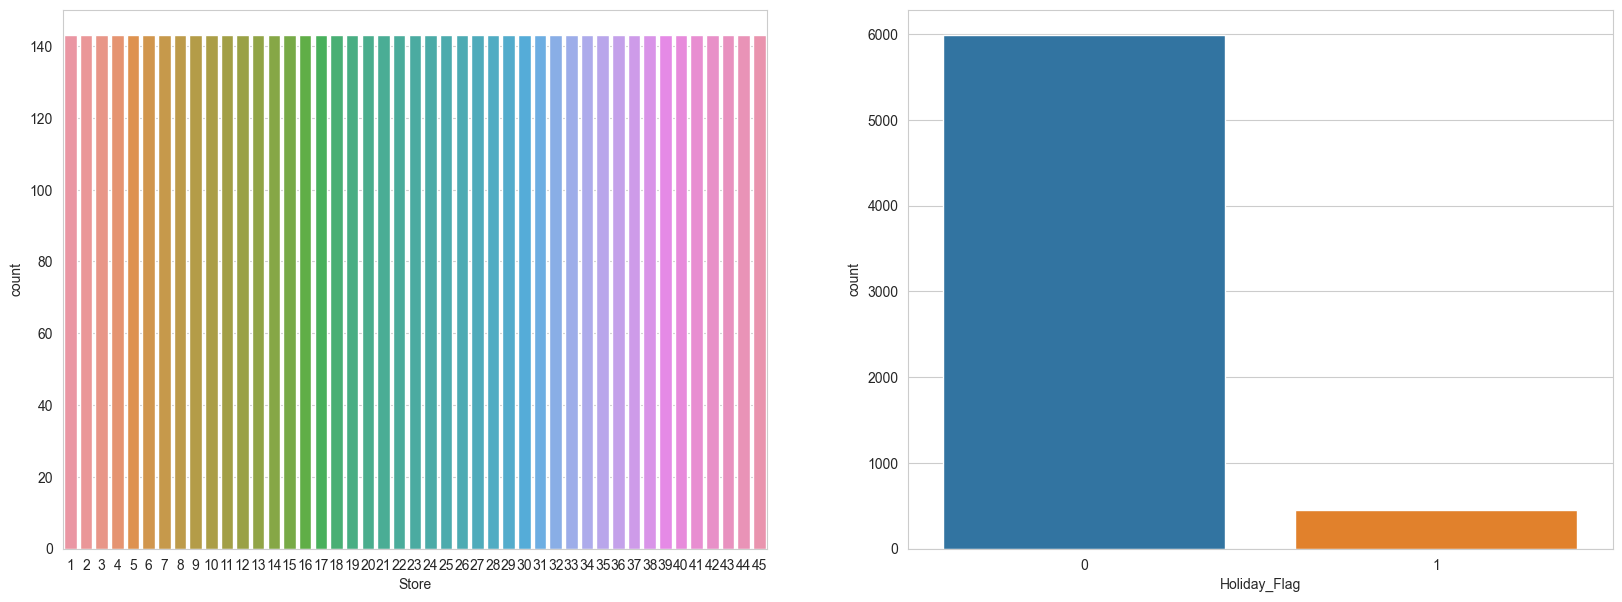

In [6]:
# Check values each columns (categorical type)
fig, ax = plt.subplots(ncols=len(cat_var), figsize=(20,7))
for i,j in enumerate(cat_var):
  sns.countplot(data=data_set, x=j, ax=ax[i])
  print(f"Column : '{j}'\nUnique values : {data_set[j].unique()}\n")

In [7]:
# Check statistic of data
data_set.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


### **Data Cleansing**

#### *Data Missing*

In [8]:
# Check missing values
count_miss = data_set.isnull().sum()
percent_miss = count_miss*100/data_set.shape[0]
print(f'Percentage of missing values :\n{percent_miss}')

Percentage of missing values :
Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64


In [35]:
# Remove columns with more than 20% of missing values
left = int(data_set.shape[0]*0.8)
df = data_set.dropna(thresh=left, axis=1)

#### *Data Outlier*

In [32]:
# Identifying Outliers with z-score
def cleanOutlier(data, num_col, threshold):
  total_out = 0
  for i in num_col:
    count_out = 1
    while count_out != 0:
      z_values = abs(zscore(data[i], ddof=0))
      out_values = z_values[z_values > threshold]
      idx = out_values.index
      count_out = out_values.count()
      total_out += count_out
      data.drop(idx, inplace=True)
  data.reset_index(drop=True, inplace=True)
  print(f'Outlier has {total_out} units. ({total_out*100/data.shape[0]:.2f}%)')

In [36]:
from scipy.stats import zscore
# outlier detection
def cleanOutlier(data, num_cols, threshold=2.5):
  total_out = 1
  while total_out != 0:
    total_out = 0
    for column in num_cols:
      z_values = abs(zscore(data[column], ddof = 0))
      outlier = z_values[z_values > threshold]
      idx = outlier.index
      count_out = outlier.count()
      total_out += count_out
      data.drop(idx, inplace=True)
  qty_outlier = data_set.shape[0] - data.shape[0]
  percent_outlier = (qty_outlier*100)/data_set.shape[0]
  print(f'Outlier : {qty_outlier} units ({percent_outlier:.2f}%)')

In [37]:
cleanOutlier(df, num_var, 2.5)
print(f'Number of sample before clear outlier : {data_set.shape[0]} samples')
print(f'Number of sample after clear outlier : {df.shape[0]} samples')

Outlier : 729 units (11.33%)
Number of sample before clear outlier : 6435 samples
Number of sample after clear outlier : 5706 samples


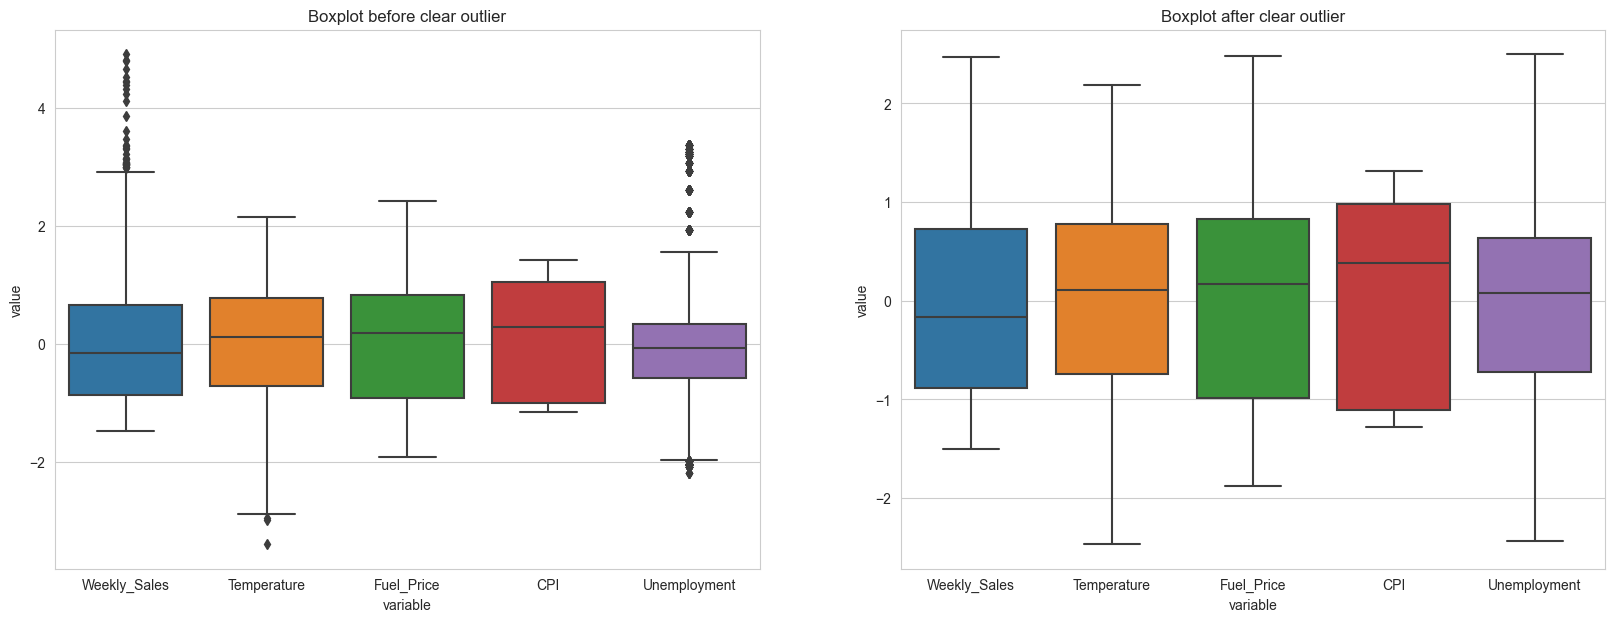

In [34]:
# Plot distribution of data (numerical variable)
fig, ax = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(data=pd.melt(zscore(data_set[num_var])),
            x='variable',
            y='value',
            ax=ax[0]
            ).set_title('Boxplot before clear outlier')
sns.boxplot(data=pd.melt(zscore(df[num_var])),
            x='variable',
            y='value',
            ax=ax[1]
            ).set_title('Boxplot after clear outlier');

#### *Duplicate Data*

In [ ]:
# Remove duplicate data
df.drop_duplicates(inplace=True)

## <center> **Exploratory data analysis**

### **Question 1:** *Which store has minimum and maximum sales?*

In [ ]:
# Total weekly sales for each store
total_sales = data_set.groupby('Store')['Weekly_Sales'].sum()
print(f'Store {total_sales.idxmax()} has maximum sales : {total_sales.max():,.2f} USD')
print(f'Store {total_sales.idxmin()} has minimum sales : {total_sales.min():,.2f} USD')

In [ ]:
# Plot properties (total sales)
# Configure the graph display 
plt.figure(figsize=(20,7))
ax = sns.barplot(x=total_sales.index,
                 y=total_sales.values,
                 order=total_sales.sort_values().index
                 )
# Configure the title text
ax.set_title("Total weekly sales for each Store", fontsize=15)
ax.set_xlabel("Store number", fontsize=13)
ax.set_ylabel("Total sales (USD)", fontsize=13);

### **Question 2:** *Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation*

In [ ]:
# Combining statistics results in weekly sales for each store. (standard deviation and mean)
sales_stats = data_set.groupby('Store').agg({'Weekly_Sales':['std','mean']})
sales_stats['Coefficient'] = sales_stats['Weekly_Sales']['std']/sales_stats['Weekly_Sales']['mean']
sales_stats.sort_values(('Weekly_Sales','std'), ascending=False).head()

In [ ]:
# The highest standard deviation of sales
max_std = sales_stats['Weekly_Sales']['std'].max()
idx_max_std = sales_stats['Weekly_Sales']['std'].idxmax()
print(f"Store {idx_max_std} has the highest standard deviation of sales : {max_std:,.2f}")
print(f"Coefficient of mean to standard deviation : {sales_stats['Coefficient'].loc[idx_max_std]:.2f}")

In [ ]:
# Plot properties (distribution of sales)
# Configure the graph display 
plt.figure(figsize=(20,7))
ax = sns.histplot(data=data_set[data_set['Store']==idx_max_std]['Weekly_Sales'],
                  kde=True
                  )
# Configure the title text
ax.set_title(f"Distribution of sales for store {idx_max_std}", fontsize=15)
ax.set_xlabel("Weekly sales (USD)", fontsize=13)
ax.set_ylabel("Count", fontsize=13);

### **Question 3:** *Which store/s has good quarterly growth rate in Q3’2012*

In [ ]:
col_use = ['Store','Date','Weekly_Sales']
df_growth = data_set[col_use].copy()
# Create new columns 'Year' and 'Quarter'
df_growth['Year'] = df_growth['Date'].dt.year
df_growth['Quarter'] = df_growth['Date'].dt.quarter

In [ ]:
# Only data for the year 2012 was filtered
df_2012 = df_growth[df_growth['Year']==2012]
# Quarter 2
quarter_2 = df_2012[df_2012['Quarter']==2]
sales_Q2 = quarter_2.groupby('Store')['Weekly_Sales'].sum().to_frame(name='Total_Sales_Q2')
# Quarter 3
quarter_3 = df_2012[df_2012['Quarter']==3]
sales_Q3 = quarter_3.groupby('Store')['Weekly_Sales'].sum().to_frame(name='Total_Sales_Q3')

In [ ]:
# Combining data from quarters 2 and 3
growth_rate = sales_Q2.merge(sales_Q3, on='Store')
growth_rate['Growth_Rate'] = (growth_rate['Total_Sales_Q3']-growth_rate['Total_Sales_Q2'])*100/growth_rate['Total_Sales_Q2']
growth_rate.sort_values('Growth_Rate', ascending=False).head()

In [ ]:
# The highest and the lowest growth rates in Q3 2012
print(f"Store {growth_rate['Growth_Rate'].idxmax()} has the highest growth rate of {growth_rate['Growth_Rate'].max():.2f}%.")
print(f"Store {growth_rate['Growth_Rate'].idxmin()} has the lowest growth rate of {abs(growth_rate['Growth_Rate'].min()):.2f}%.")

In [ ]:
# Plot properties (total sales and growth rate 2012 in quarter 2 and 3 for each store)
df_plot = pd.melt(growth_rate.drop('Growth_Rate',axis=1), ignore_index=False)
# Configure the graph display and title text
# Total sales
fig, ax = plt.subplots(nrows=2, figsize=(20,14))
sns.barplot(x=df_plot.index,
            y=df_plot['value'],
            hue=df_plot['variable'],
            ax=ax[0]
            ).set_title("Total sales 2012 in quarter 2 and 3 for each store", fontsize=15)
ax[0].set_xlabel("Store number", fontsize=13)
ax[0].set_ylabel("Total sales (USD)", fontsize=13)
ax[0].legend(title='Quarter', fontsize=10)
# Growth rate
sns.barplot(x=growth_rate.index,
            y=growth_rate['Growth_Rate'],
            ax=ax[1]
            ).set_title("Growth rate in the third quarter of 2012", fontsize=15)
ax[1].set_xlabel("Store number", fontsize=13)
ax[1].set_ylabel("Growth rate", fontsize=13);

### **Question 4:** *Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together*
* Super Bowl : 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
* Labor Day : 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
* Thanksgiving : 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
* Christmas : 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [ ]:
col_use = ['Date','Weekly_Sales','Holiday_Flag']
df_holiday = data_set[col_use][data_set['Holiday_Flag']==1].copy()
holiday_list = {
    'Super Bowl Date' : pd.to_datetime(['2010-02-12','2011-02-11','2012-02-10']),
    'Labor Day' : pd.to_datetime(['2010-09-10','2011-09-09','2012-09-07']),
    'Thanksgiving' : pd.to_datetime(['2010-11-26','2011-11-25','2012-11-23']),
    'Christmas' : pd.to_datetime(['2010-12-31','2011-12-30','2012-12-28'])
}
# Create new columns 'Holiday'
for i in holiday_list:
  df_holiday.loc[df_holiday['Date'].isin(holiday_list[i]), 'Holiday'] = i

In [ ]:
# Mean sales for each holiday
# Holiday
mean_sales_holiday = df_holiday.groupby('Holiday')['Weekly_Sales'].mean().to_frame(name='Mean_Sales')
# Non-Holiday
non_holiday = {
    'Mean_Sales': data_set['Weekly_Sales'][data_set['Holiday_Flag']==0].mean()
}
df_non_holiday = pd.DataFrame([non_holiday],index=['Normal Day'])
# Combining data from mean sales in holiday and non-holiday
mean_sales = pd.concat([mean_sales_holiday,df_non_holiday], axis=0)
mean_sales

In [ ]:
# The highest mean sales
print(f"'{mean_sales['Mean_Sales'].idxmax()}' holiday has higher sales than another events : {mean_sales['Mean_Sales'].max():,.2f} USD")

In [ ]:
# Plot properties (Mean sales for each store)
# Configure the graph display
plt.figure(figsize=(20,7))
ax = sns.barplot(x=mean_sales.index, 
                 y=mean_sales['Mean_Sales'], 
                 palette='pastel'
                 )
# Configure the title text
for index, row in mean_sales.reset_index().iterrows():
  ax.text(index, row['Mean_Sales'], '{:,.2f}'.format(row['Mean_Sales']), ha='center', color='black')
ax.set_title(f"Mean sales for each holiday", fontsize=15)
ax.set_xlabel("Holiday name", fontsize=13)
ax.set_ylabel("Mean sales (USD)", fontsize=13);

### **Question 5:** *Provide a monthly and semester view of sales in units and give insights*

In [ ]:
col_use = ['Weekly_Sales','Date']
df_sum = df[col_use].copy()
# Create new column 'Month','Year' and 'Semester'
df_sum['Month'] = df_sum['Date'].dt.month
df_sum['Year'] = df_sum['Date'].dt.year
year = df_sum['Year'].unique()
Semester = {
    'Semester_1' : np.arange(1,7),
    'Semester_2' : np.arange(6,13)
    }
for idy,y in enumerate(year):
    for ids,s in enumerate(Semester):
        df_sum.loc[(df_sum['Month'].isin(Semester[s]))&(df_sum['Year']==y), 'Semester'] = ids+1+(idy*2)

In [ ]:
df_sum.head()

In [ ]:
# Plot properties 
# Configure the graph display (total monthly sales)
fig, ax = plt.subplots(ncols=2, figsize = (20,7))
sns.lineplot(data=df_sum,
             x='Month',
             y='Weekly_Sales',
             hue='Year',
             estimator=np.sum,
             palette='pastel',
             ax=ax[0]
             ).set_title('Total monthly sales for each year', fontsize=15)
ax[0].set_xlabel("Month", fontsize=13)
ax[0].set_ylabel("Total sales (USD)", fontsize=13)
ax[0].legend(title='Year', fontsize=10)
# Configure the graph display (total sales per semester)
sns.lineplot(data=df_sum,
             x='Semester',
             y='Weekly_Sales',
             estimator =np.sum,
             ax=ax[1]
             ).set_title('Total sales per semester', fontsize=15)
ax[1].set_xlabel("Semester", fontsize=13)
ax[1].set_ylabel("Total sales (USD)", fontsize=13);

In [ ]:
# Total monthly sales for each year
monthly_sales = df_sum.pivot_table(index='Month', values='Weekly_Sales', columns='Year', aggfunc='sum', fill_value=0, margins=True)
month = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
    }
monthly_sales

In [ ]:
print(f"The highest annual sales (2010-2012) were {monthly_sales.loc['All'][:2].max():,.2f} USD in {monthly_sales.loc['All'][:2].idxmax()}.")
print(f"The highest total monthly sales for 3 years (2010-2012) were {monthly_sales['All'][:12].max():,.2f} USD in {month[monthly_sales['All'][:12].idxmax()]}.\n")
for i in year:
  print(f'----------------------- Year : {i} -----------------------')
  print(f"The highest sales in {i} were {monthly_sales[i][:12].max():,.2f} USD in {month[monthly_sales[i][:12].idxmax()]}.")
  print(f"The lowest sales in {i} were {monthly_sales[i][:12].min():,.2f} USD in {month[monthly_sales[i][:12].idxmin()]}.\n")

In [ ]:
# Total sales per semester
semester_sales = df_sum.pivot_table(index='Semester', values='Weekly_Sales', aggfunc='sum', margins=True)
semester_sales

In [ ]:
print(f"The highest sales in the semester were {semester_sales['Weekly_Sales'][:6].max():,.2f} USD in semester {int(semester_sales['Weekly_Sales'][:6].idxmax())}")
print(f"The lowest sales in the semester were {semester_sales['Weekly_Sales'][:6].min():,.2f} USD in semester {int(semester_sales['Weekly_Sales'][:6].idxmin())}")

## <center> **Modelling**

### **Question 6:** *Build prediction to forecast demand*

#### **Prepare data**

In [ ]:
# Use the data after "Data Cleaning"
df_sales = df.copy()
# Create new columns "Year" and "Month"
df_sales['Year'] = df_sales['Date'].dt.year
df_sales['Month'] = df_sales['Date'].dt.month
df_sales.drop(columns='Date', inplace=True)
df_sales.info()

##### *Dummies variable*

In [ ]:
# Update the category variable into the "cat_var".
cat_var = ['Store','Holiday_Flag','Year','Month']

In [ ]:
def createDummies(data, cat_col):
  global df_dum
  df_dum = data.copy()
  df_dum[cat_col] = df_dum[cat_col].astype('category')
  df_dum = pd.get_dummies(df_dum, prefix=cat_col, drop_first=True)

In [ ]:
createDummies(df_sales, cat_var)
df_dum.head()

##### *Split data for train and test*


In [ ]:
x = df_dum.drop(columns='Weekly_Sales')
y = df_dum['Weekly_Sales']
# Divide the data into 2 sets: a training set and a test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)
print(f"Training set : {x_train.shape[0]:,} samples ({x_train.shape[0]*100/df_dum.shape[0]:.2f}%)")
print(f"Test set : {x_test.shape[0]:,} samples ({x_test.shape[0]*100/df_dum.shape[0]:.2f}%)")

#### **Dimensionality Reduction**

##### *Feature Scaling*

In [ ]:
# Feature scaling, use "StandardScaler"
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
df_train_sc = pd.DataFrame(x_train_sc, columns=x_train.columns)
df_train_sc.head()

#### **Train Model**

##### *Algorithm Comparison*

In [ ]:
# Choose the best algorithm
model_list = [
    ('mlr',LinearRegression()),
    ('llr',Lasso(tol = 1.275e+11)),
    ('rid',Ridge()),
    ('enr',ElasticNet()),
    ('rfr',RandomForestRegressor())
]

In [ ]:
def modelCompare(models,feature,target):
  global score
  r_score = []
  names = []
  feature_sc = sc.fit_transform(feature)
  for name, model in models:
    cvs = cross_val_score(model,feature_sc,target,cv=10)
    names.append(name)
    r_score.append(cvs.mean()*100)
    score = pd.DataFrame(list(zip(names,r_score)), columns=['Algorithm','Score(%)'])

In [ ]:
modelCompare(model_list,x_train,y_train)
score

In [ ]:
# Choose models with the highest efficiency
idx_max = score['Score(%)'].idxmax()
model = model_list[idx_max][1]
print(f"The algorithm '{model}' has the highest efficiency were {score['Score(%)'].max():.2f}%")

##### *Model Tuning*


In [ ]:
# Model tuning, use "Grid Search"
param_dist = {
    'criterion' : ['squared_error','absolute_error','friedman_mse','poisson'],
    'max_features' : [1.0,'sqrt','log2'],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_dist, verbose=0, n_jobs=-1)
grid_result = grid_search.fit(x_train_sc, y_train)

In [ ]:
print(f"High efficiency for the model after turning were {(grid_search.best_score_)*100:.2f}%")
print(f"Parameter obtained from tuning : {grid_search.best_params_}")
print(f"Use parameter : {model.get_params()}")

##### *Predict values*


In [ ]:
# Model parameterization
# Create pipeline
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('model', grid_search.best_estimator_),
])

In [ ]:
# Predict values
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

In [ ]:
# Create a dataframe to collect the predicted values.
result = y_test.to_frame()
result['Predict_Values'] = y_pred
result['Diff'] = abs(result['Weekly_Sales']-result['Predict_Values'])
result['Diff(%)'] = (result['Diff']*100)/result['Weekly_Sales']
result.head()

In [ ]:
# Configure the graph display
fig, ax = plt.subplots(figsize=(20,7))
sns.scatterplot(x=y_pred,
                y=y_test,
                ax=ax
                )
sns.lineplot(x=y_pred,
             y=y_pred,
             color='r',
             ax=ax
             )
# Configure the title text
ax.set_title('Result of Weekly sales', fontsize=15);
ax.set_xlabel("Predict values", fontsize=13)
ax.set_ylabel("True values", fontsize=13);